# Pymaceuticals Inc.
---

### Analysis
Based on our data, we can see that the amount of male and female mice are almost the same, when we remove the duplicate mouse. 

Based on our analyzed and fixed data, we can note that there is a larger amount of mice that were treated with capomulin and ramicane. We can also see that Infubinol was the only drug seen that has an outlier according to the box plot. On the line chart for mouse 1509, we can see that the longer time they spent on Capomulin, the volume of the tumor size decreased per a span of 40 days. Lastly, we can see that there is a positive correlation between the average tumor volume and the weight, which could mean that heavier mice tend to have larger tumor volumes. 
 

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_study = pd.merge(mouse_metadata,study_results, how="left", on=["Mouse ID","Mouse ID"])

# Display the data table for preview
combined_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [54]:
# Checking the number of mice.
mice_count = len(combined_mouse_study["Mouse ID"].unique())
mice_count

249

In [55]:
# Our data should be uniquely identified by Mouse ID and Timepoint
organized_mouse_order = ["Mouse ID", "Timepoint", "Tumor Volume (mm3)","Metastatic Sites","Drug Regimen","Sex","Age_months","Weight (g)"]
organized_mouse_study = combined_mouse_study[organized_mouse_order]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dupe =  organized_mouse_study.loc[organized_mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mice_dupe # This will show which mouse is being duplicated. The Mouse ID will print


array(['g989'], dtype=object)

In [56]:
# Optional: Get all the data for the duplicate mouse ID. 
# Below will allow us to find the info of the duplicate mouse g989
mice_dupe_df = organized_mouse_study.loc[organized_mouse_study["Mouse ID"] =="g989",:]
# to match the starter code output, they organized the information by ascending timepoint
sorted_mice_dupe_df = mice_dupe_df.sort_values(by="Timepoint",ascending=True)
sorted_mice_dupe_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [57]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = organized_mouse_study[organized_mouse_study['Mouse ID'].isin(mice_dupe)==False]
clean_mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [58]:
# Checking the number of mice in the clean DataFrame.
official_mice_count = len(clean_mouse_study["Mouse ID"].unique())
official_mice_count

248

## Summary Statistics

In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Summary stats
mean_tumor_vol = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_vol = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor_vol = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor_vol = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor_vol = clean_mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem() # I had to import sem from scipy.stats to utilize .sem

# Assemble the resulting series into a single summary DataFrame.

drug_regimen_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_vol, 
                                "Median Tumor Volume": median_tumor_vol,
                                "Tumor Volume Variance": variance_tumor_vol,
                                "Tumor Volume Std. Dev.": std_tumor_vol,
                                "Tumor Volume Std. Err": sem_tumor_vol,
                                })

drug_regimen_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [60]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
advanced_drug_regimen_df = clean_mouse_study.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
advanced_drug_regimen_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

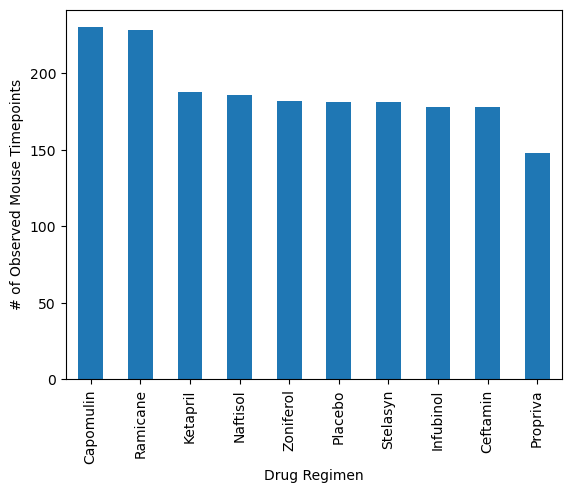

In [61]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_id_timepoints = clean_mouse_study["Drug Regimen"].value_counts()
mouse_id_timepoints

# Plotting bar chart
mouse_id_timepoints_bar = mouse_id_timepoints.plot(kind="bar", 
                                                   xlabel="Drug Regimen", 
                                                   ylabel= "# of Observed Mouse Timepoints")

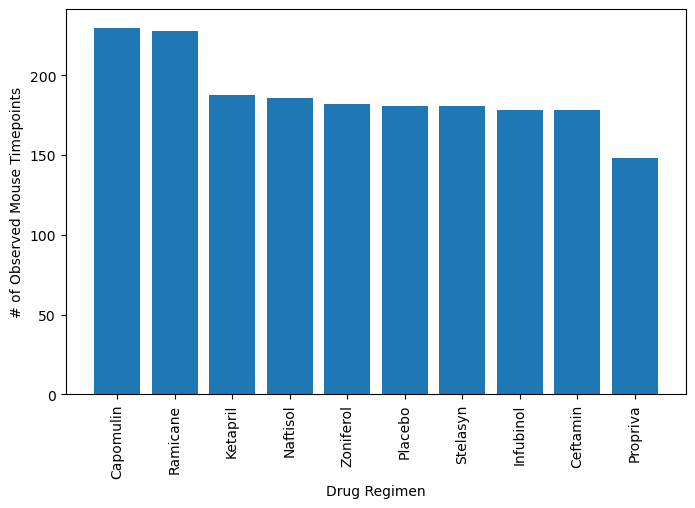

In [62]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_id_timepoints
# setting x axis
x_axis = np.arange(len(mouse_id_timepoints))
tick_labels = mouse_id_timepoints.index
plt.figure(figsize=(8,5))
plt.bar(x_axis, mouse_id_timepoints,align="center")
plt.xticks(x_axis, tick_labels,rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [63]:
mouse_gender = clean_mouse_study["Sex"].value_counts()
mouse_gender

Sex
Male      958
Female    922
Name: count, dtype: int64

Text(0, 0.5, 'Sex')

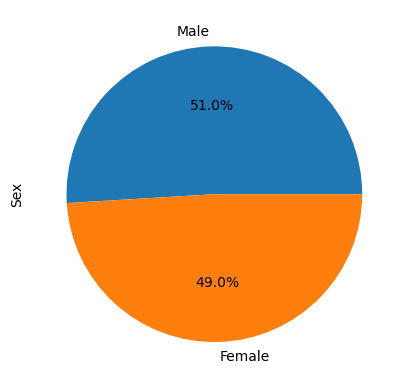

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = clean_mouse_study["Sex"].value_counts()
mouse_gender_pie = mouse_gender.plot(kind="pie",autopct="%1.1f%%")
mouse_gender_pie.set_ylabel("Sex")

<function matplotlib.pyplot.show(close=None, block=None)>

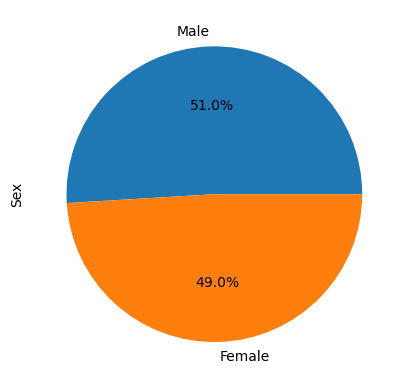

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_gender,autopct="%1.1f%%",labels=mouse_gender.index)
plt.ylabel("Sex")
plt.show

## Quartiles, Outliers and Boxplots

In [66]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs_only= clean_mouse_study.loc[(clean_mouse_study["Drug Regimen"] == "Capomulin")|
               (clean_mouse_study["Drug Regimen"] == "Ramicane")|
               (clean_mouse_study["Drug Regimen"] == "Infubinol")|
               (clean_mouse_study["Drug Regimen"] == "Ceftamin") ]
# Start by getting the last (greatest) timepoint for each mouse
drugs_timepoint_last = drugs_only.groupby(["Drug Regimen","Mouse ID"]).last()
reset_drugs_tp = drugs_timepoint_last.reset_index()
new_drugs_tp_timepoint = reset_drugs_tp[["Drug Regimen","Tumor Volume (mm3)"]]

# Create dataframes for each drug
capomulin_df = new_drugs_tp_timepoint.loc[new_drugs_tp_timepoint["Drug Regimen"] == "Capomulin"]
ramicane_df = new_drugs_tp_timepoint.loc[new_drugs_tp_timepoint["Drug Regimen"] == "Ramicane"]
infubinol_df = new_drugs_tp_timepoint.loc[new_drugs_tp_timepoint["Drug Regimen"] == "Infubinol"]
ceftamin_df = new_drugs_tp_timepoint.loc[new_drugs_tp_timepoint["Drug Regimen"] == "Ceftamin"]


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
clean_mouse_tumortime_df = pd.DataFrame({"Capomulin":capomulin_df["Tumor Volume (mm3)"],
         "Ramicane":ramicane_df["Tumor Volume (mm3)"],
          "Infubinol":infubinol_df["Tumor Volume (mm3)"],
          "Ceftamin":ceftamin_df["Tumor Volume (mm3)"]})

clean_mouse_tumortime_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,NaN,NaN,NaN
1,38.939633,NaN,NaN,NaN
2,30.485985,NaN,NaN,NaN
3,37.074024,NaN,NaN,NaN
4,40.159220,NaN,NaN,NaN
...,...,...,...,...
95,NaN,30.276232,NaN,NaN
96,NaN,40.667713,NaN,NaN
97,NaN,43.166373,NaN,NaN
98,NaN,44.183451,NaN,NaN


In [69]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = []
treatment = 0
for drug_name in new_drugs_tp_timepoint["Drug Regimen"]:
    if drug_name not in treatment_list:
        treatment_list.append(drug_name)
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
for drug_name in treatment_list:
    quartiles = clean_mouse_tumortime_df[drug_name].quantile([.25,.50,.75])
    upper_q = quartiles[.75]
    lower_q = quartiles[.25]
    iqr = upper_q-lower_q
    lower_outlier = round(lower_q - (1.5*iqr),2)
    upper_outlier = round(upper_q + (1.5*iqr),2)
    if treatment == 0:
        print(f"{drug_name}'s potential outliers: {lower_outlier} and {upper_outlier}")


Capomulin's potential outliers: 20.7 and 51.83
Ceftamin's potential outliers: 25.36 and 87.67
Infubinol's potential outliers: 36.83 and 82.74
Ramicane's potential outliers: 17.91 and 54.31


Text(0, 0.5, 'Final Tumor Volume (mm3)')

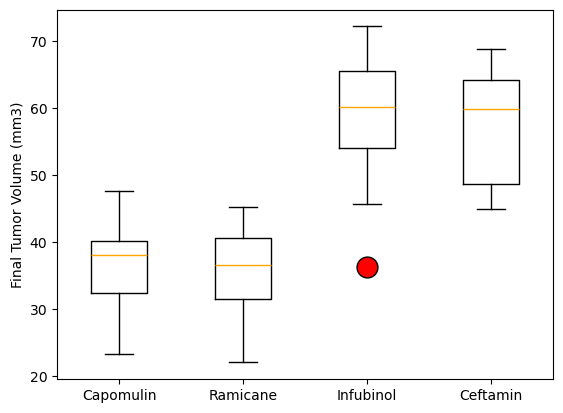

In [42]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = clean_mouse_tumortime_df[["Capomulin","Ramicane","Infubinol","Ceftamin" ]].boxplot(grid=False,color=dict(boxes='black',whiskers='black',medians='orange'),flierprops=dict(marker='o', markerfacecolor='red', markersize=15))
boxplot.set_ylabel("Final Tumor Volume (mm3)")

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

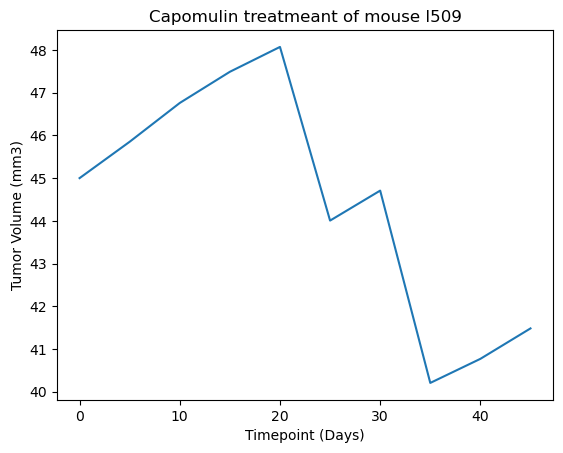

In [43]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mice = clean_mouse_study.loc[(clean_mouse_study["Drug Regimen"] == "Capomulin")]
line_mouse1509 = capomulin_mice.loc[capomulin_mice["Mouse ID"] == "l509",:]
x_axis = line_mouse1509["Timepoint"]
tumor_size = line_mouse1509["Tumor Volume (mm3)"]
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumor_size)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

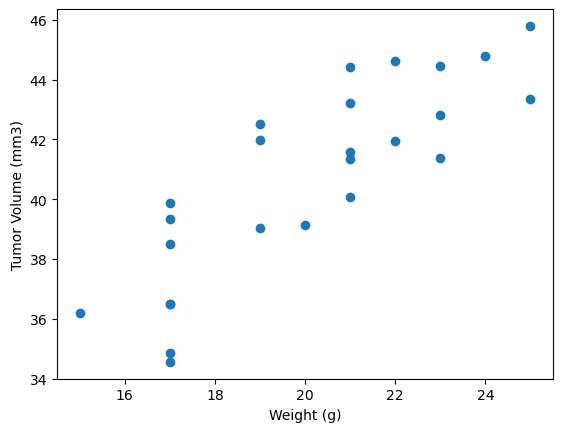

In [44]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mice_group = capomulin_mice.groupby("Mouse ID")
tumor_vol_avg = capomulin_mice_group[("Tumor Volume (mm3)")].mean()
weight = capomulin_mice_group[("Weight (g)")].mean()
avg_tum_weight = pd.DataFrame({"Weight (g)": weight,
                               "Tumor Volume (mm3)": tumor_vol_avg})
# Building scatterplot
plt.scatter(weight, tumor_vol_avg)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


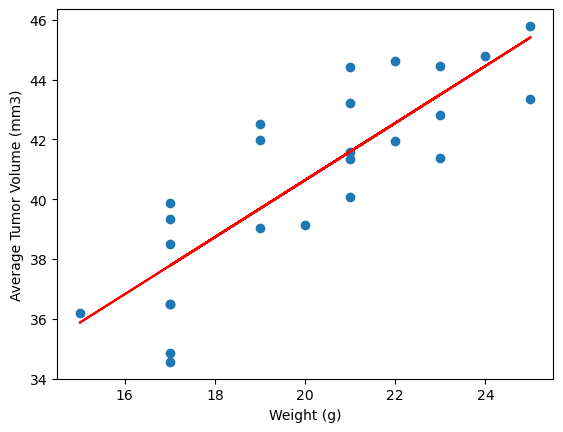

In [51]:
# Calculate the correlation coefficient and a linear regression model 
correlation_coefficient = round(avg_tum_weight["Weight (g)"].corr(avg_tum_weight["Tumor Volume (mm3)"]),2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")
# Linear Regression
mouse_slope, mouse_int, mouse_r, mouse_p, mouse_std_err = st.linregress(weight, tumor_vol_avg)
mouse_line = mouse_slope * weight + mouse_int

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(weight, tumor_vol_avg)
plt.plot(weight,mouse_line, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()